In [7]:
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import category_encoders as ce

In [8]:
df = pd.read_csv("Students_data.csv")

char_to_numeric = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25,
    'AA': 26,
    'AB': 27
}
df_mapped = df.replace(char_to_numeric)

X_features = df_mapped.iloc[:,-5: -1].columns
X = df_mapped[X_features]
y = df_mapped['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
encoder = ce.BinaryEncoder(cols=['from1', 'from2', 'from3'])
encoded_X_train = encoder.fit_transform(X_train)
encoded_X_test = encoder.transform(X_test)

C:\Users\amare\AppData\Local\Temp\ipykernel_23272\1214945185.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapped = df.replace(char_to_numeric)
c:\Users\amare\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\amare\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffi

# Model Normalization

In [9]:
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
mean_y = np.mean(y_train)
std_y = np.std(y_train)

X_train_norm = (X_train - mean_X) / std_X
y_train_norm = (y_train - mean_y) / std_y

In [10]:


# Data points
#X = X_train_norm
#y = y_train_norm
# X= [[item[0]] for item in X.values]
#y = [[item[0]] for item in X.values]

ValueError: x and y must be the same size

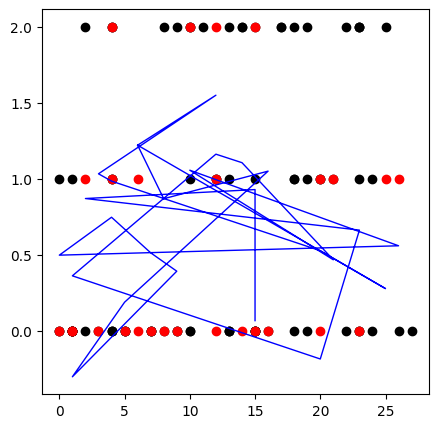

In [39]:

regr = LinearRegression(fit_intercept=True)
regr.fit(encoded_X_train, y_train)
# y_pred_test = [ round(x) for x in regr.predict(X)]
y_pred_train = regr.predict(encoded_X_train)
y_pred_test = regr.predict(encoded_X_test)

# Initialize subplots
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
# print(encoded_X_train)
def plot_model(feature):
    plt.scatter(X_train[feature], y_train, color='black', label='Train data points')
    plt.scatter(X_test[feature], y_test, color='red', label='Test data points')
    plt.plot(X_test[feature], y_pred_test, color='blue', linewidth=1, label='Model')
    plt.scatter(X_train[feature], y_pred_test, marker='x', color='red', linewidth=3, label='Test Pred.')
    plt.title(feature)
    plt.legend()
    plt.show()

for feature in X_features:
    plot_model(feature)



In [ ]:

# Initialize KFold
kf = KFold(n_splits=3, random_state=None)
total_test_mse = 0
total_train_mse = 0

for j, (train_index, test_index) in enumerate(kf.split(X)):
    # Split data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Ridge regression model
    ridge = LinearRegression(fit_intercept=True)
    ridge.fit(X_train, y_train)

    # Train and test MSE
    train_mse = np.mean((ridge.predict(X_train) - y_train) ** 2)
    test_mse = np.mean((ridge.predict(X_test) - y_test) ** 2)
    total_train_mse += train_mse
    total_test_mse += test_mse

    # Plotting
    ax = axs[j]  # switching i and j indices
    ax.scatter(X_train, y_train, color='blue', label='Train Data')
    ax.scatter(X_test, y_test, color='red', label='Test Data')
    ax.plot(X, ridge.predict(X), color='green', label=f'Ridge Regression Model\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.legend(fontsize=12)

    # Increase tick font size
    ax.tick_params(axis='both', which='major', labelsize=12)


plt.tight_layout()
plt.show()


KeyError: "None of [Index([ 35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,\n        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,\n        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,\n        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,\n        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104],\n      dtype='int32')] are in the [columns]"